# Outlier Detection and Removal Using Cluster Analysis
# Pima Indians Diabetes Database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset was to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [246]:
#import the required library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [247]:
#import dataset
data = pd.read_csv('diabetes.csv')

In [248]:
#see the number of rows and columns in data
data.shape

(768, 9)

In [249]:
#view first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [250]:
#see the columns in data
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [251]:
# Check for Missing data
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [252]:
#features extraction; extraction of important features
diabetic_features = data[['Glucose','Insulin','BMI','Age']]

In [253]:
# preview extracted features
diabetic_features

,Glucose,Insulin,BMI,Age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


In [254]:
# Standardizing the features for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetic_features)

In [255]:
# Choose the number of clusters
num_clusters = 3

In [256]:
# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [257]:
# Fit the model to the scaled features
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [258]:
data['cluster_label'] = kmeans.labels_

In [259]:
cluster_distribution = data['cluster_label'].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

Cluster Distribution:
0    414
1    210
2    144
Name: cluster_label, dtype: int64


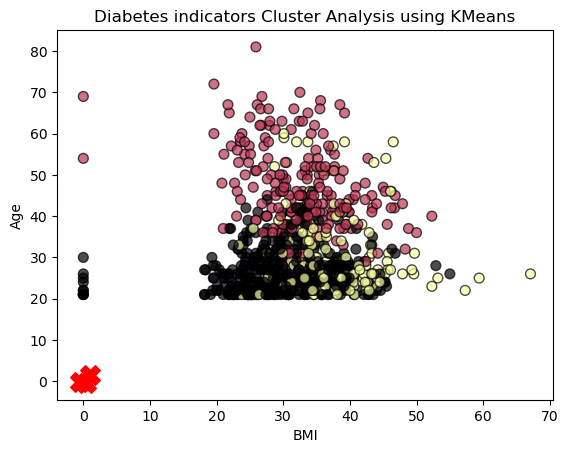

In [260]:
# Visualization of cluster on Scatter Plot using Age and BMI
plt.scatter(data['BMI'], data['Age'],c=data['cluster_label'], cmap='inferno', edgecolor='k', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Diabetes indicators Cluster Analysis using KMeans')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

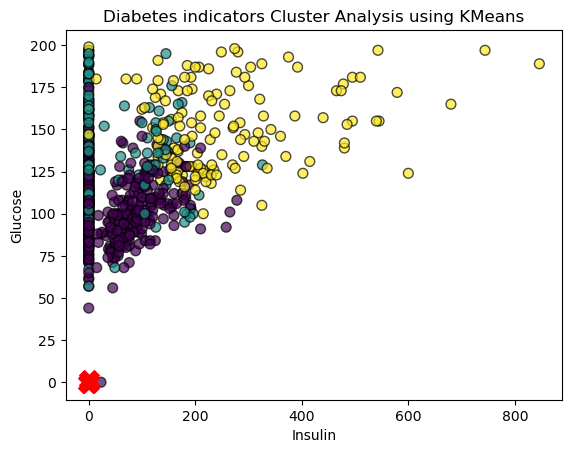

In [261]:
# Visualization of cluster on Scatter Plot Using GLucose and Insulin
plt.scatter(data['Insulin'], data['Glucose'],c=data['cluster_label'], cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Diabetes indicators Cluster Analysis using KMeans')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()

<Figure size 800x600 with 0 Axes>

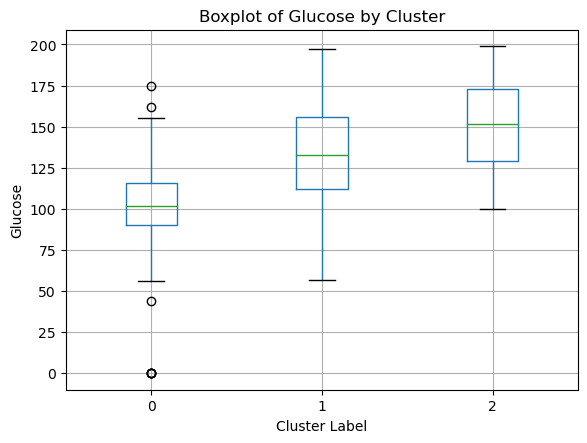

<Figure size 800x600 with 0 Axes>

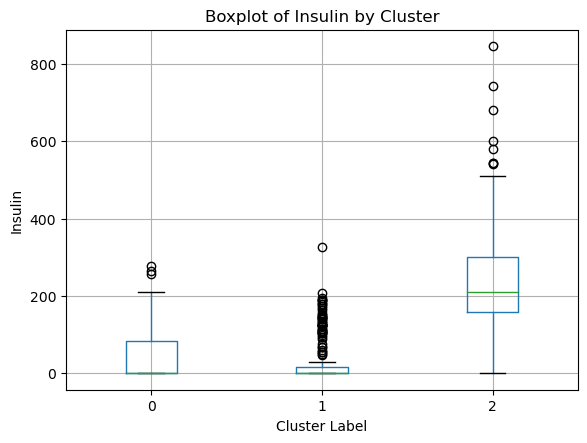

<Figure size 800x600 with 0 Axes>

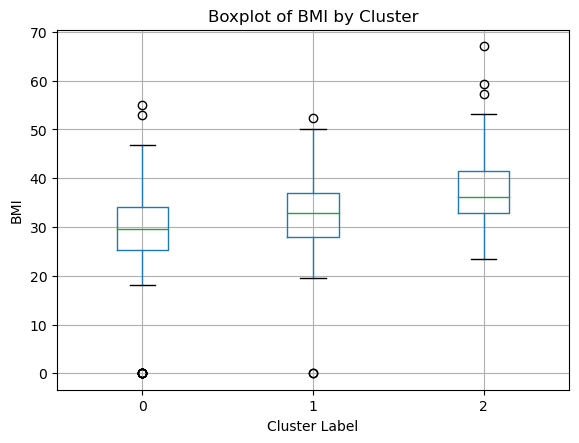

<Figure size 800x600 with 0 Axes>

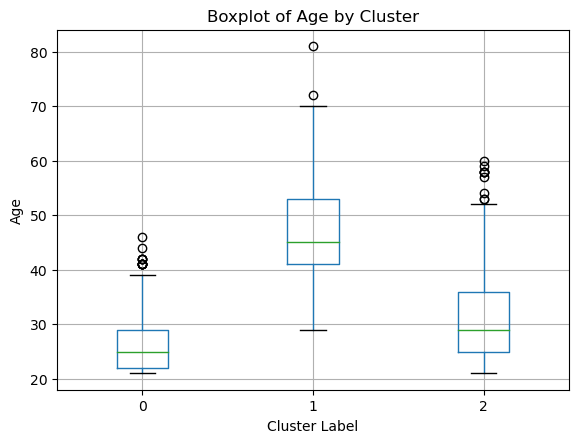

In [262]:
# Visualize clusters using box plots to identify outliers
for feature in diabetic_features.columns:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=[feature], by='cluster_label', showfliers=True)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.suptitle('')
    plt.xlabel('Cluster Label')
    plt.ylabel(feature)
    plt.show()

In [263]:
# Identify and remove outliers based on predefined thresholds
# Define ranges and thresholds for each feature to identify outliers
bmi_range = (14, 50)
age_range = (21, 60)
threshold_insulin = 500
threshold_glucose = 180

# Identify and remove outliers
outliers = data[(
    (data['BMI'] < bmi_range[0]) | (data['BMI'] > bmi_range[1]) |
    (data['Age'] < age_range[0]) | (data['Age'] > age_range[1]) |
    (abs(data['Insulin']) > threshold_insulin) |
    (abs(data['Glucose']) > threshold_glucose)
)]

In [264]:
# Display the number of outliers
print(f"Number of outliers to be removed: {len(outliers)}")

Number of outliers to be removed: 87


In [265]:
# Remove outliers from the original dataset
clean_data = data.drop(outliers.index)

In [266]:
# Display the updated shape of the dataset after removing outliers
print(f"Shape of the dataset after removing outliers: {clean_data.shape}")

Shape of the dataset after removing outliers: (681, 10)


In [267]:
#preview clean data
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster_label
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2
5,5,116,74,0,0,25.6,0.201,30,0,0
...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [268]:
# Features extraction from cleaned data
clean_diabetic_features = clean_data[['Glucose','Insulin','BMI','Age']]

In [269]:
# Standardizing the features for KMeans on the cleaned data
clean_scaled_features = scaler.fit_transform(clean_diabetic_features)

In [270]:
# Create a KMeans model on the cleaned data
kmeans_cleaned = KMeans(n_clusters=num_clusters, random_state=42)

In [271]:

# Fit the model to the scaled features of the cleaned data
kmeans_cleaned.fit(clean_scaled_features)

clean_data['cluster_label'] = kmeans_cleaned.labels_

In [272]:
# Visualize the clusters on Scatter Plots for cleaned data
# Display the updated cluster distribution
clean_cluster_distribution = clean_data['cluster_label'].value_counts()
print("Updated Cluster Distribution after Outlier Removal:")
print(clean_cluster_distribution)

Updated Cluster Distribution after Outlier Removal:
0    341
1    183
2    157
Name: cluster_label, dtype: int64


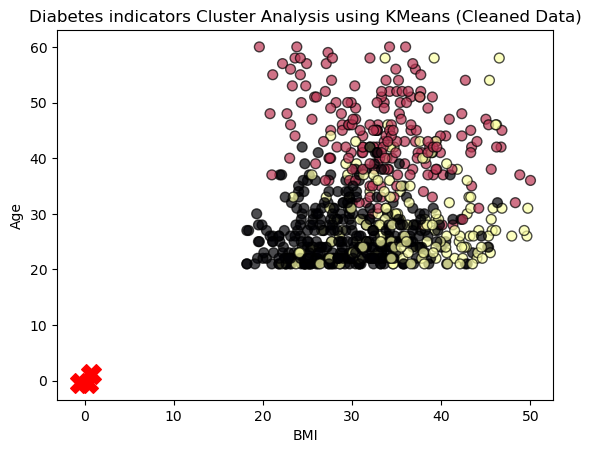

In [273]:
# Visualization of cluster on Scatter Plot for cleaned data
plt.scatter(clean_data['BMI'], clean_data['Age'], c=clean_data['cluster_label'], cmap='inferno', edgecolor='k', s=50, alpha=0.7)
plt.scatter(kmeans_cleaned.cluster_centers_[:, 0], kmeans_cleaned.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Diabetes indicators Cluster Analysis using KMeans (Cleaned Data)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

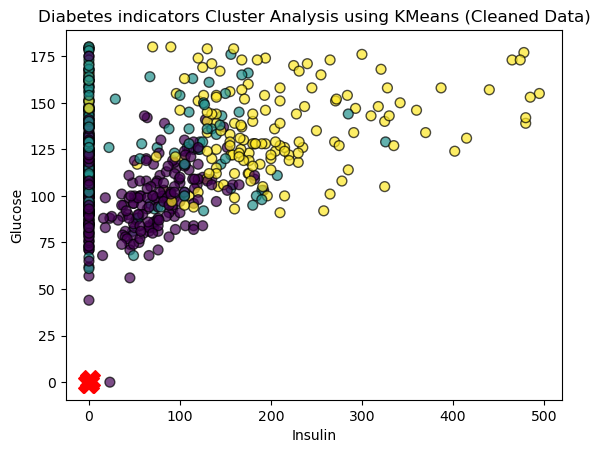

In [274]:
# Visualization of cluster on Scatter Plot for cleaned data
plt.scatter(clean_data['Insulin'], clean_data['Glucose'], c=clean_data['cluster_label'], cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.scatter(kmeans_cleaned.cluster_centers_[:, 0], kmeans_cleaned.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Diabetes indicators Cluster Analysis using KMeans (Cleaned Data)')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()